In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf


# Machine learning 
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score 
  
# To plot 
import matplotlib.pyplot as plt 
plt.style.use('seaborn-darkgrid') 
  
# To ignore warnings 
import warnings 
warnings.filterwarnings("ignore")

/var/folders/l9/lgcrjc856bb1g071byrjw6rr0000gn/T/ipykernel_46714/1921324318.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [22]:
# Load Data
ticker_symbol = 'AAPL'
start_date = dt.datetime(2010, 1, 1)
end_date = dt.datetime(2022, 12, 31)
df = yf.download(ticker_symbol, start=start_date, end=end_date)

df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470741,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481928,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378825,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367032,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409363,447610800


In [23]:
# Calculate daily returns
df['daily_returns'] = df['Close'].pct_change()

# Define a function to calculate volatility over a specified window
def calculate_volatility(df, window=20):
    return df['daily_returns'].rolling(window=window).std() * np.sqrt(252)  # Annualized

# Add volatility features for different windows
df['volatility_60'] = calculate_volatility(df, window=60)

df.dropna(inplace=True)

df.head()

,Open,High,Low,Close,Adj Close,Volume,daily_returns,volatility_20,volatility_60,volatility_120
Date,,,,,,,,,,
2010-06-25,9.645000,9.652500,9.493214,9.525000,8.063857,549942400,-0.008550,0.271377,0.351456,0.314007
2010-06-28,9.533214,9.633929,9.447143,9.582143,8.112237,584948000,0.005999,0.268471,0.351518,0.314059
2010-06-29,9.432857,9.442500,9.082143,9.148929,7.745481,1133344800,-0.045211,0.311983,0.364311,0.320417
2010-06-30,9.168214,9.213214,8.928929,8.983214,7.605185,739452000,-0.018113,0.314031,0.366447,0.321676
2010-07-01,9.082143,9.100000,8.686429,8.874286,7.512964,1022896000,-0.012126,0.315994,0.367370,0.322212


In [34]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler
scaler = MinMaxScaler()

# Fit and transform the data
df_scaled = pd.DataFrame(scaler.fit_transform(df[['Close', 'volatility_60']]), columns=['Close', 'volatility_60'])

df_scaled.head()

,Close,volatility_60
0,0.005512,0.403955
1,0.005842,0.404055
2,0.003344,0.424892
3,0.002389,0.428372
4,0.001761,0.429874


In [31]:
# Compute the correlation
correlation = df[['Close', 'volatility_20', 'volatility_60', 'volatility_120']].corr()

# Print the correlation
print(correlation)

                   Close  volatility_20  volatility_60  volatility_120
Close           1.000000       0.221727       0.254076        0.320767
volatility_20   0.221727       1.000000       0.713532        0.559703
volatility_60   0.254076       0.713532       1.000000        0.802069
volatility_120  0.320767       0.559703       0.802069        1.000000


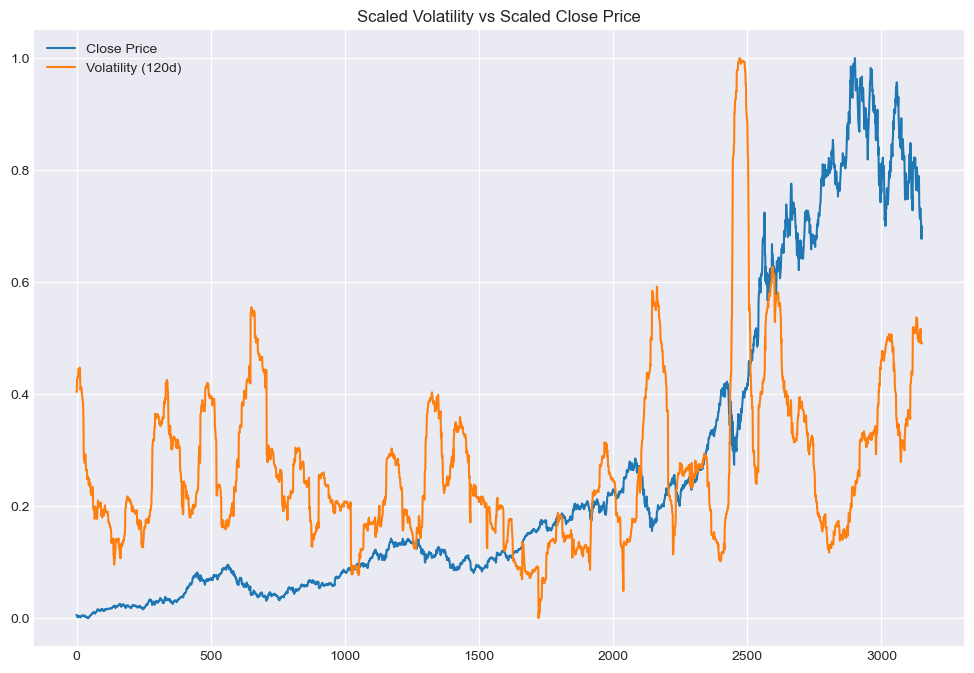

In [33]:


# Plot the scaled data
plt.figure(figsize=(12,8))
plt.plot(df_scaled['Close'], label='Close Price')
plt.plot(df_scaled['volatility_60'], label='Volatility (120d)')
plt.title('Scaled Volatility vs Scaled Close Price')
plt.legend()
plt.show()